# Fine-tune from ImageNet pretrained model to train a bird classification model.

In [1]:
import sys
sys.path.append('..')
import torch
import matplotlib.pyplot as plt
import random
import os
from resnet_image_embedding import ResnetImageEmbedding
from towhee.trainer.training_config import TrainingConfig
from torchvision import transforms
from torchvision.datasets import ImageFolder

# build a resnet32 op with 400 classes output
op = ResnetImageEmbedding('resnet34', num_classes=400)

### download [BIRDS 400](https://www.kaggle.com/gpiosenka/100-bird-species) from kaggle dataset.
### replace this the `bird_400_path` with your download path.

In [2]:
# replace with your own dataset path.
bird_400_path = '/home/zhangchen/zhangchen_workspace/dataset/bird_400/'

#### build a training config:

In [3]:
training_config = TrainingConfig()
training_config.batch_size = 32
training_config.epoch_num = 4
training_config.output_dir = 'bird_output'

In [4]:
std = (0.229, 0.224, 0.229)
mean = (0.485, 0.456, 0.406)
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean=mean, std=std),
                                transforms.RandomHorizontalFlip(p=0.5)
                               ])
train_data = ImageFolder(os.path.join(bird_400_path, 'train'), transform=transform)
eval_data = ImageFolder(os.path.join(bird_400_path, 'valid'), transform=transform)

#### start to train.

In [5]:
op.train(training_config, train_dataset=train_data, eval_dataset=eval_data)

2022-03-04 17:41:49,336 - 139967684245312 - trainer.py-trainer:390 - WARNING: TrainingConfig(output_dir='bird_output', overwrite_output_dir=True, eval_strategy='epoch', eval_steps=None, batch_size=32, val_batch_size=-1, seed=42, epoch_num=4, dataloader_pin_memory=True, dataloader_drop_last=True, dataloader_num_workers=0, lr=5e-05, metric='Accuracy', print_steps=None, load_best_model_at_end=False, early_stopping={'monitor': 'eval_epoch_metric', 'patience': 4, 'mode': 'max'}, model_checkpoint={'every_n_epoch': 1}, tensorboard={'log_dir': None, 'comment': ''}, loss='CrossEntropyLoss', optimizer='Adam', lr_scheduler_type='linear', warmup_ratio=0.0, warmup_steps=0, device_str=None, freeze_bn=False)
[epoch 1/4] loss=2.244, metric=0.668, eval_loss=2.222, eval_metric=0.935: 100%|███████████████████████████████████████████| 1824/1824 [03:39<00:00,  8.31step/s]
[epoch 2/4] loss=0.403, metric=0.939, eval_loss=0.426, eval_metric=0.964: 100%|███████████████████████████████████████████| 1824/1824 [0

2022-03-04 17:25:15,019 - 140613268227904 - image.py-image:725 - WARNING: Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


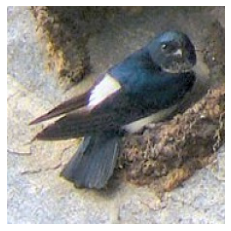

It is black baza.
probability = 0.26655182242393494


In [85]:
# get random picture and predict it.
img_index = random.randint(0, len(eval_data))
img = eval_data[img_index][0]
img = img.numpy().transpose(1, 2, 0)  # (C, H, W) -> (H, W, C)
pil_img = img * std + mean
plt.axis('off')
plt.imshow(pil_img)
plt.show()
test_img = eval_data[img_index][0].unsqueeze(0).to(op.trainer.configs.device)
logits = op.trainer.predict(test_img)
out = torch.softmax(logits, dim=-1)
probability = torch.max(out).item()
predict_num = torch.argmax(out).item()
print('It is {}.'.format(eval_data.classes[predict_num].lower()))
print('probability = {}'.format(probability))

### You can re-run this predicting code cell to make sure whether this bird prediction bird class is right.
